# Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated. The goal of this project is to use the collection of features to predict whether or not a claim is fraudulent.

# About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is whether claim application is fraudulent or not - FraudFound_P

## 1. Import and Read

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, make_scorer
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn import tree
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
orig_url="https://drive.google.com/file/d/1vvJdGZr935i5wDAFh2s0s8NUM5O0ni9n/view?usp=drive_link" # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df['FraudFound_P'].shape

(15420,)

In [ ]:
print(df.dtypes)  # Displays data types of each column


Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

## 2. Find Missing Values

In [ ]:
print(df.isnull().sum())  # Count of missing values per column


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100  # Missing value percentage
print(missing_percentage[missing_percentage > 0])  # Show only columns with missing data



Series([], dtype: float64)


In [ ]:
print(df.nunique())  # Number of unique values per column


Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [ ]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [ ]:
df['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [ ]:
print(df.describe())  # Descriptive statistics for numerical variables
num_cols = ["WeekOfMonth", "WeekOfMonthClaimed", "Age", "FraudFound_P",
"PolicyNumber", "RepNumber", "Deductible", "DriverRating", "Year"] #separate numerical columns

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000 

<h4> Observations:

- There is observation with Age of '0' which is impossible. Therefore we can impute this later with the Average Age of 40.

In [ ]:
print(df.describe(include=['object']))  # Summary of categorical variables
cat_cols = ['Month',
    'DayOfWeek',
    'Make',
    'AccidentArea',
    'DayOfWeekClaimed',
    'MonthClaimed',
    'Sex',
    'MaritalStatus',
    'Fault',
    'PolicyType',
    'VehicleCategory',
    'VehiclePrice',
    'Days_Policy_Accident',
    'Days_Policy_Claim',
    'PastNumberOfClaims',
    'AgeOfVehicle',
    'AgeOfPolicyHolder',
    'PoliceReportFiled',
    'WitnessPresent',
    'AgentType',
    'NumberOfSuppliments',
    'AddressChange_Claim',
    'NumberOfCars',
    'BasePolicy']
df[cat_cols].head()


        Month DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
count   15420     15420    15420        15420            15420        15420   
unique     12         7       19            2                8           13   
top       Jan    Monday  Pontiac        Urban           Monday          Jan   
freq     1411      2616     3837        13822             3757         1446   

          Sex MaritalStatus          Fault         PolicyType  ...  \
count   15420         15420          15420              15420  ...   
unique      2             4              2                  9  ...   
top      Male       Married  Policy Holder  Sedan - Collision  ...   
freq    13000         10625          11230               5584  ...   

       PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
count               15420        15420             15420             15420   
unique                  4            8                 9                 2   
top                

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


<h1> 3. Histograms of All Quantitative Variables

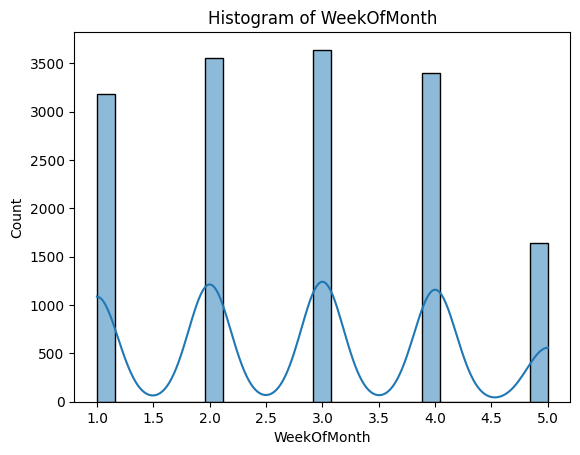

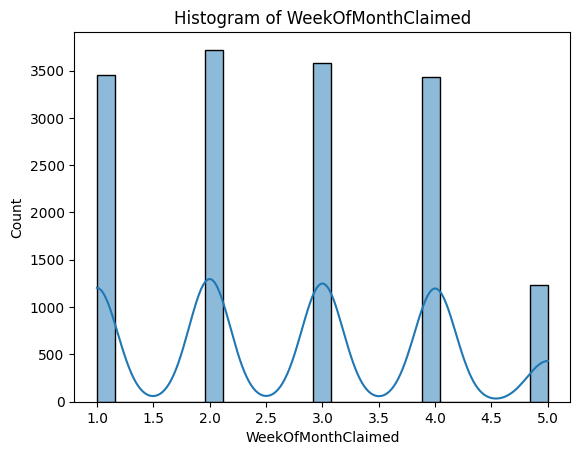

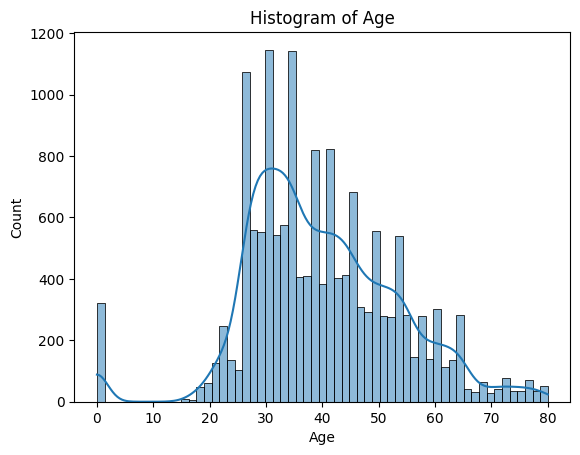

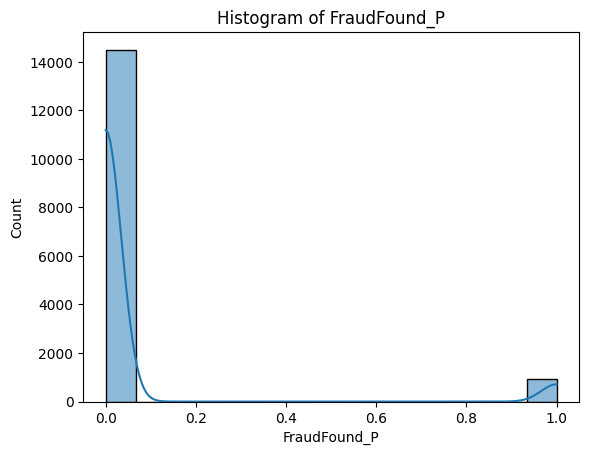

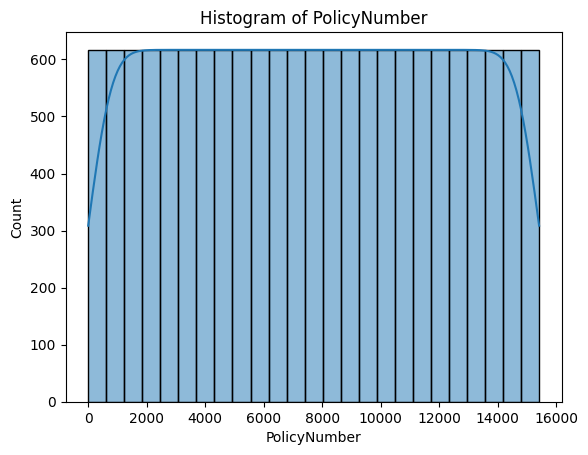

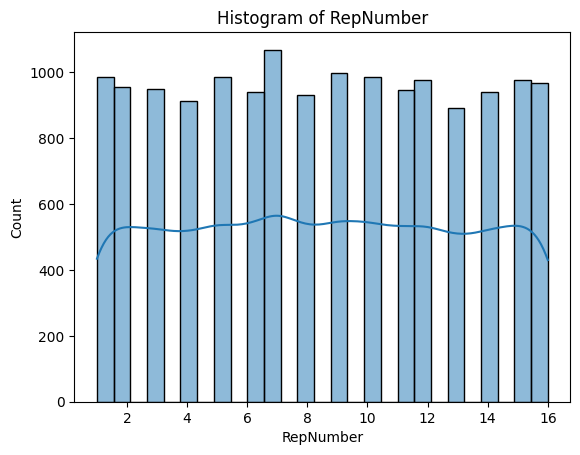

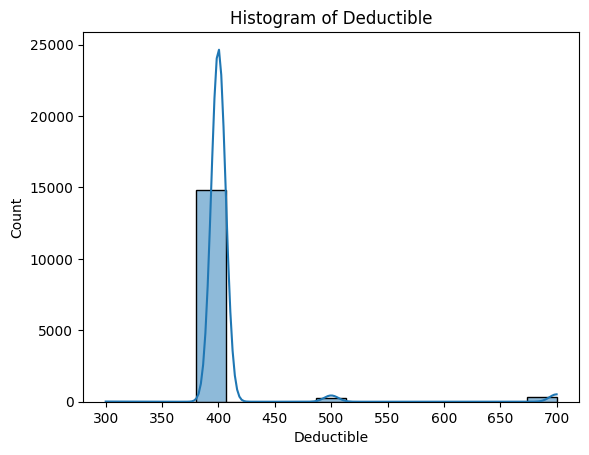

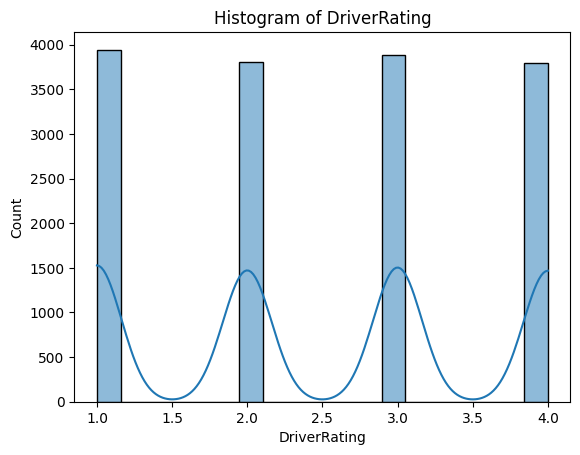

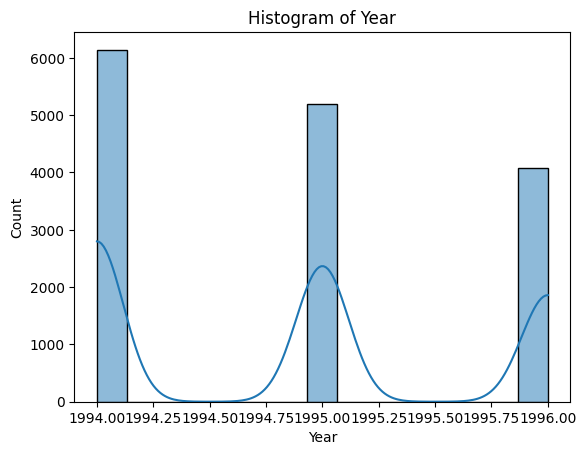

In [ ]:
#plot histograms of all num_cols with seaborn
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

<h4>

**Observations** <h4>
- **Week Of Month Claimed:**
  - Most claims are distributed evenly, with the majority around start until middle of the month. Less likely to be at the end of month.
- **Age:**
  - Some observations are 0 of Age which is impossible. Age are almost normally distributed with the Mean around the Age of 40.
- **Deductible:**
    - Most deductible of claims are 400 with some outliers of 700 dollars
- **Driver Rating:**
    - Ratings are even distributed between 1 to 4.

<h1> 4. Data Visualization for Categorical Vars

<h2> Univariate Analysis <h2

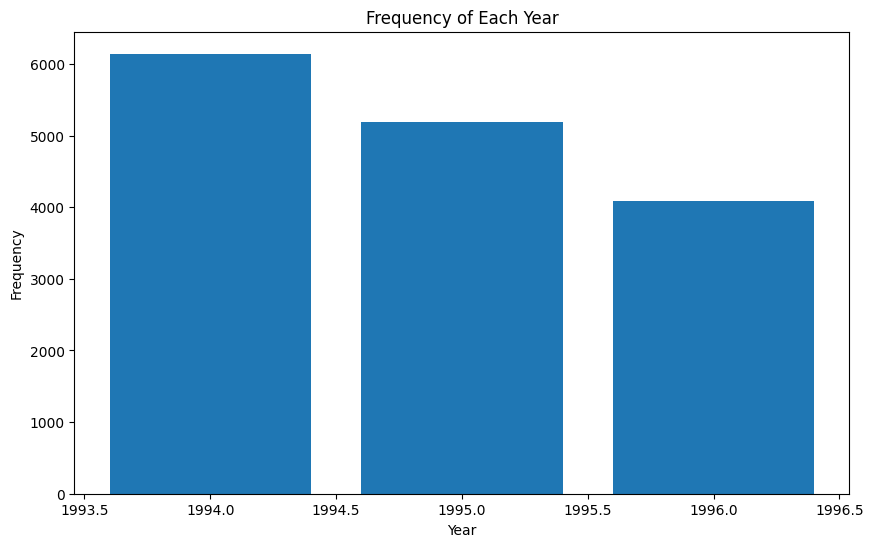

In [ ]:
# Let's take a closer look at Year var
year_counts = df['Year'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.title('Frequency of Each Year')
plt.show()

In [ ]:
# A function to visualize frequency of each category
def catFreq(df, cat_col):
    cat_counts = df[cat_col].value_counts()
    plt.figure(figsize=(10,6))
    plt.bar(cat_counts.index, cat_counts.values)
    plt.xlabel(cat_col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Each {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

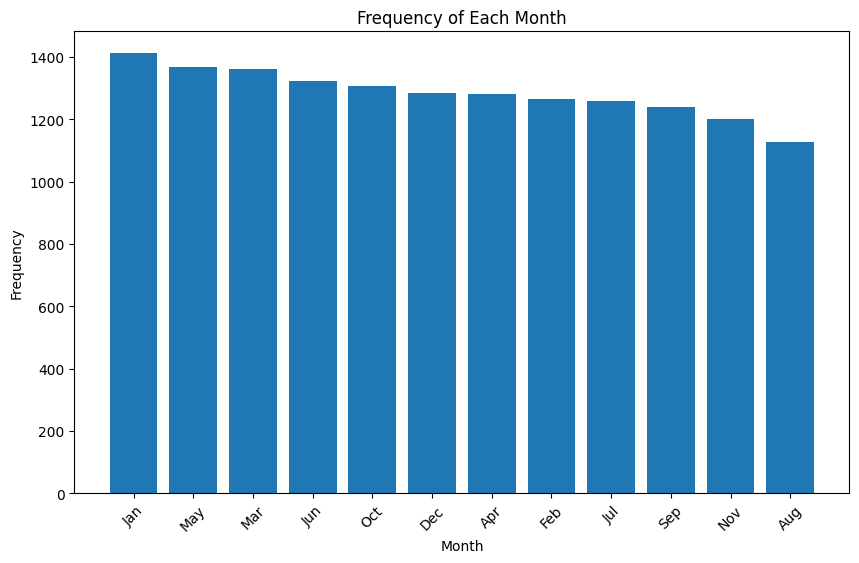

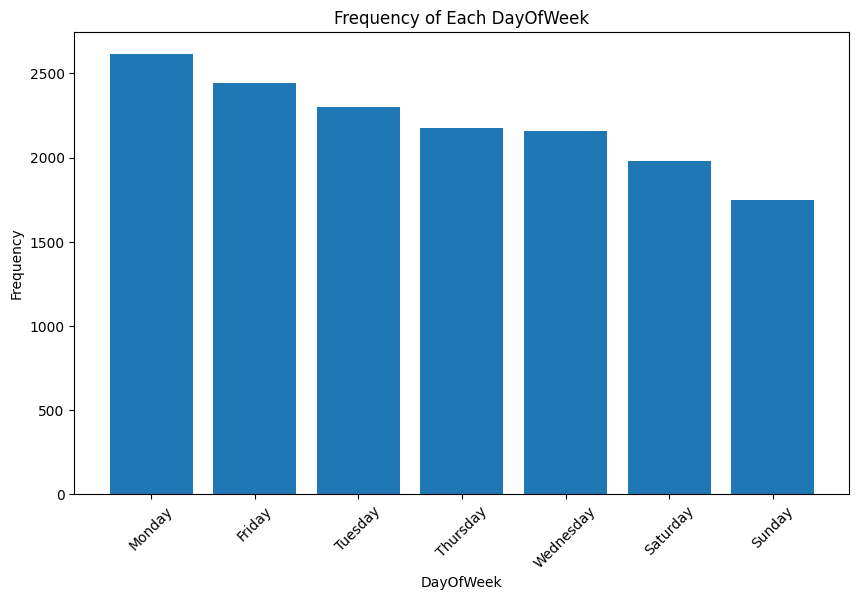

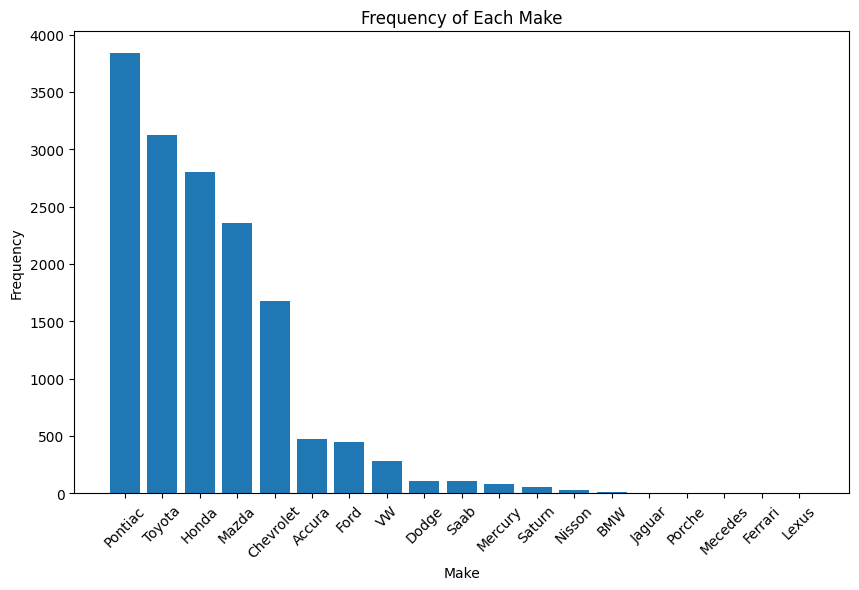

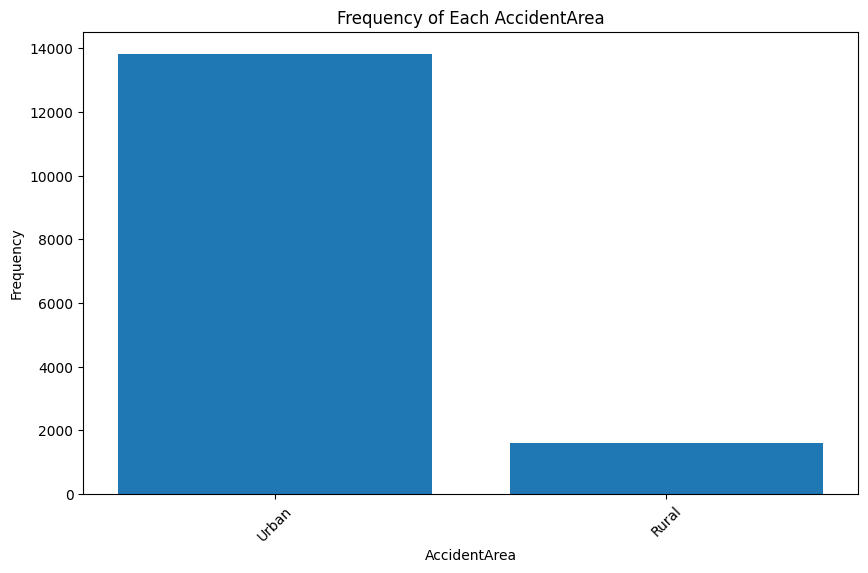

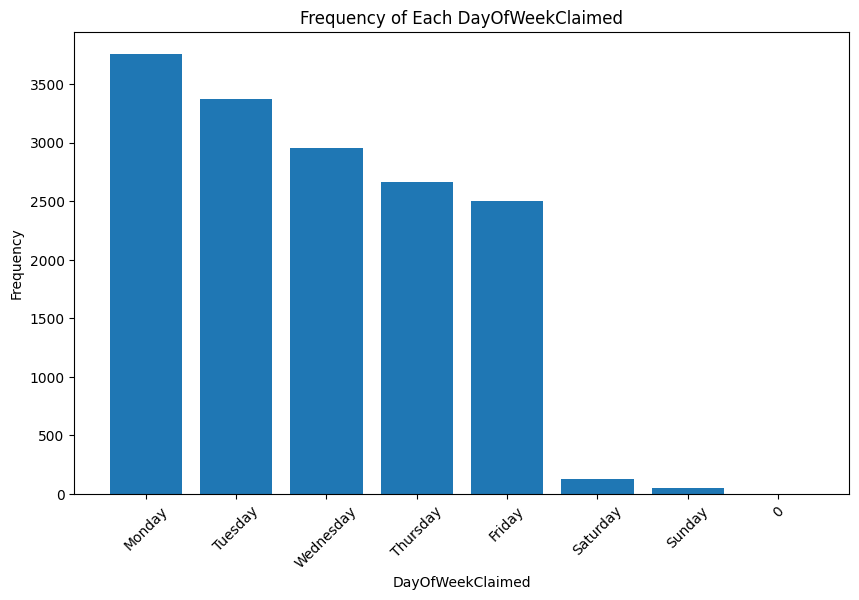

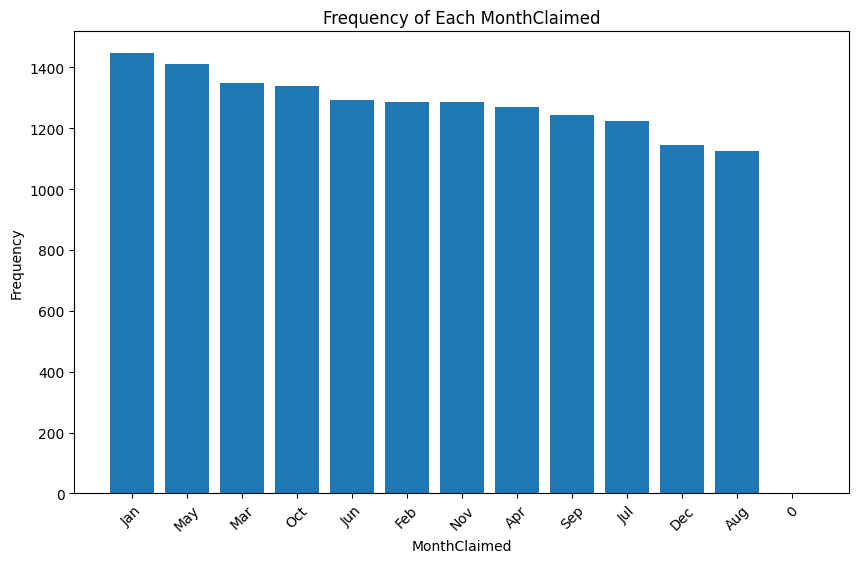

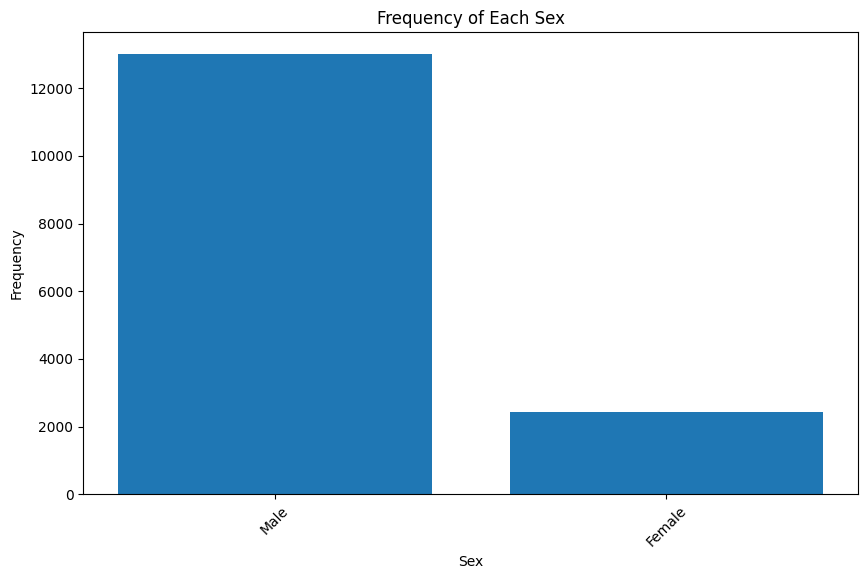

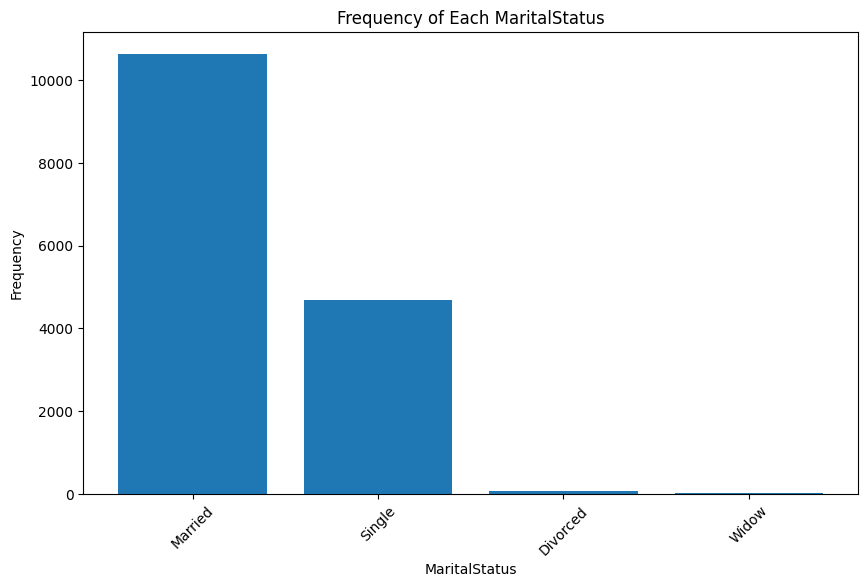

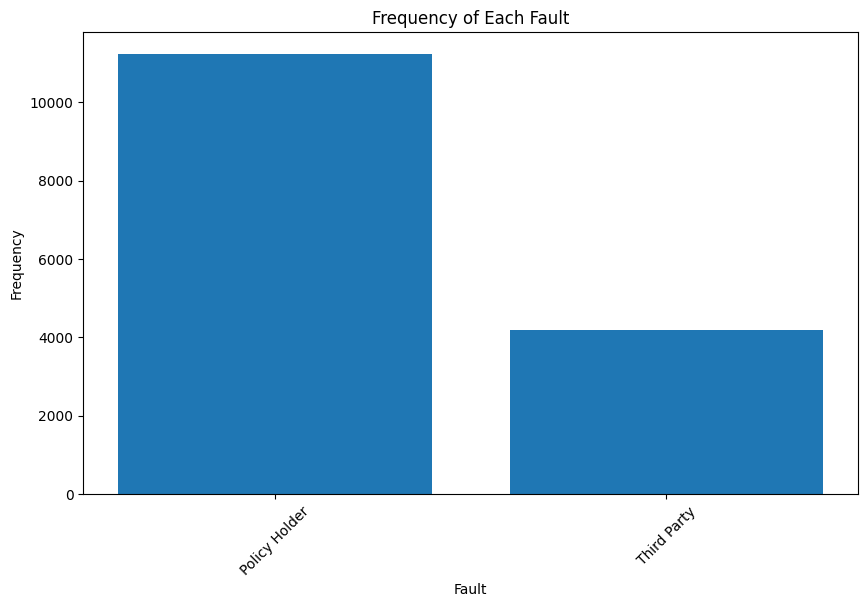

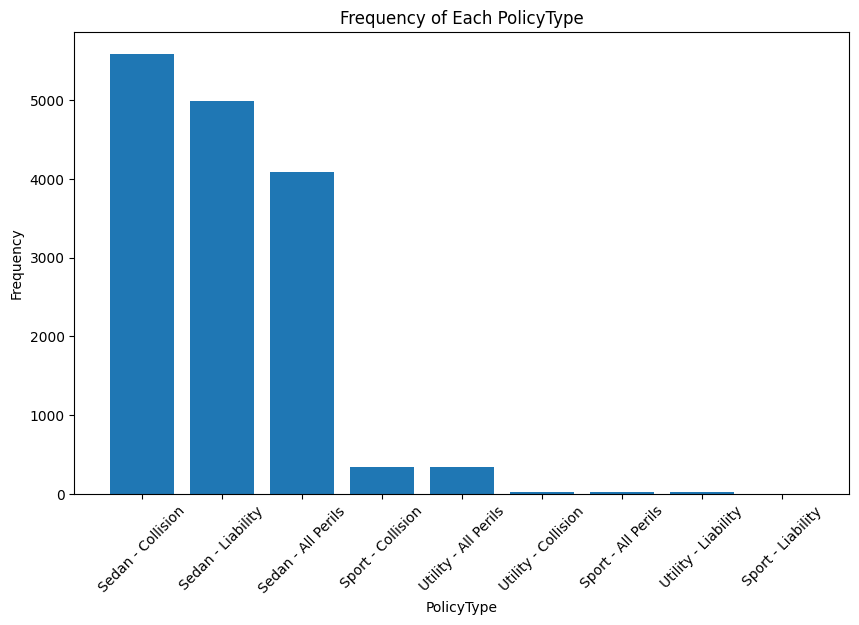

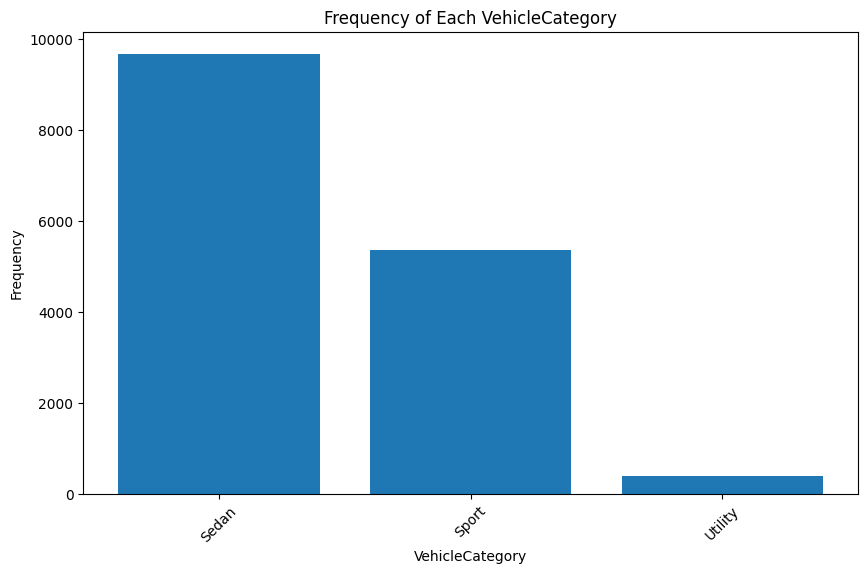

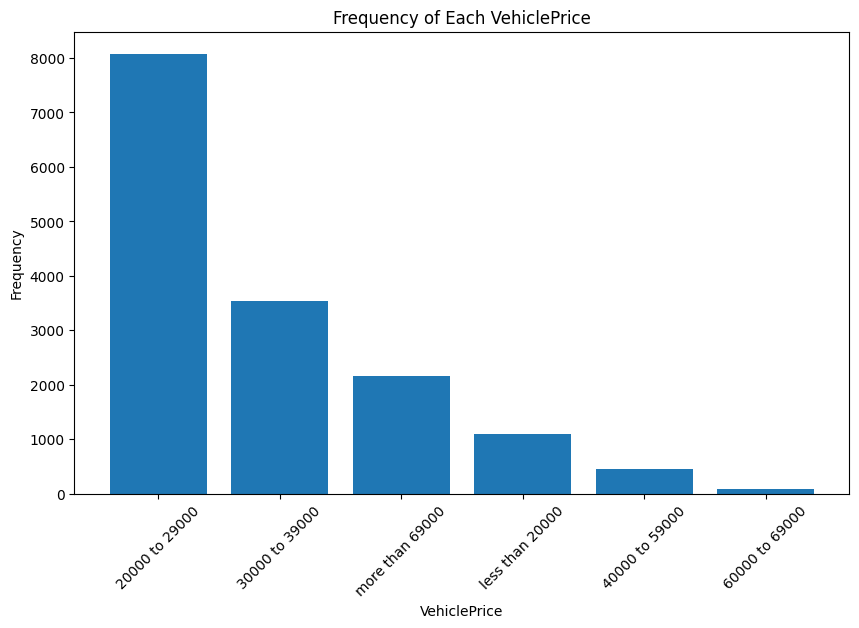

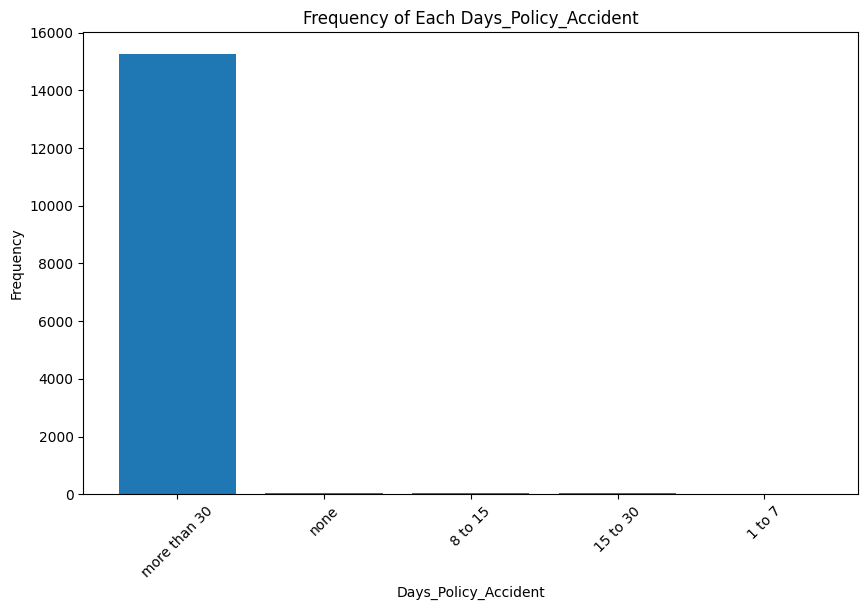

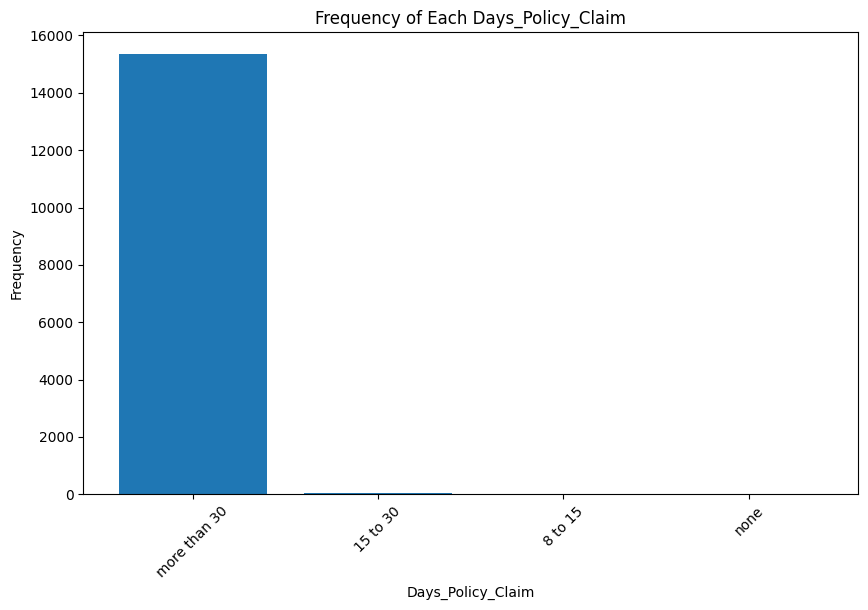

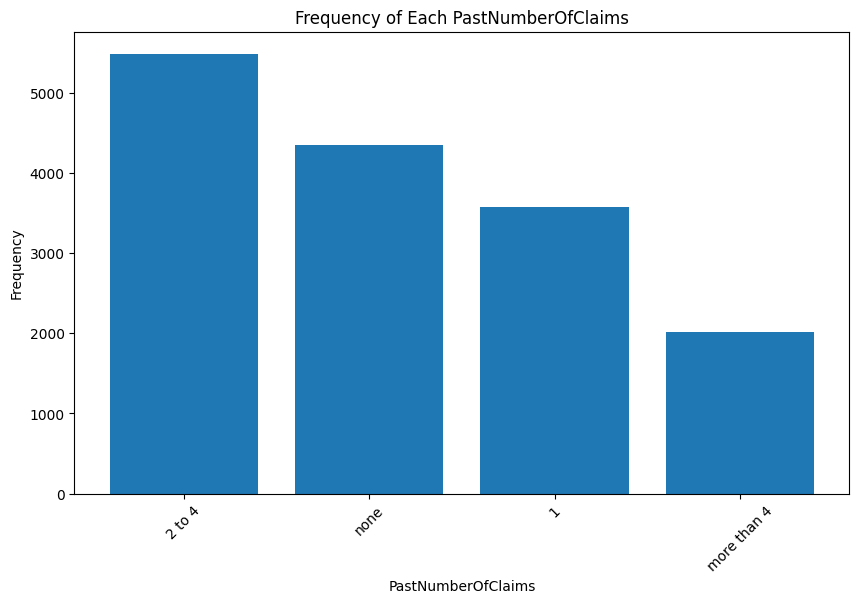

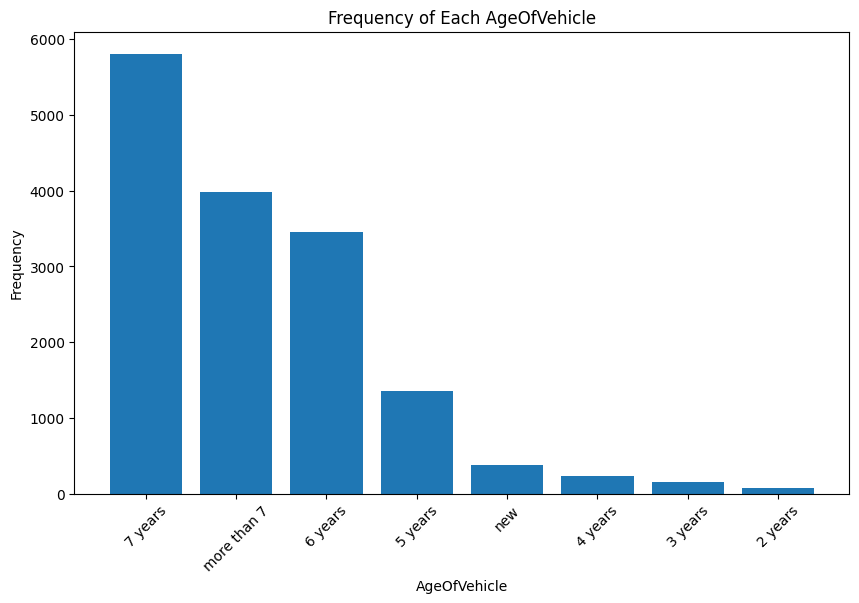

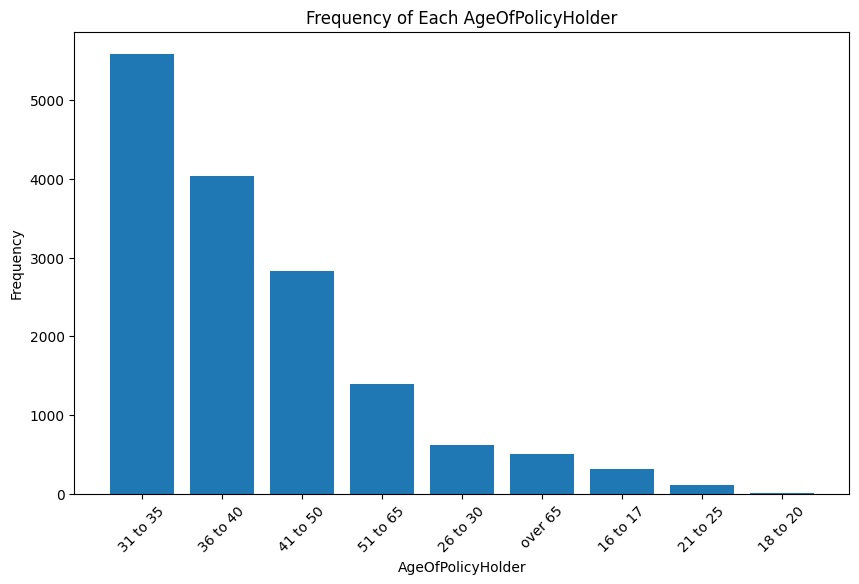

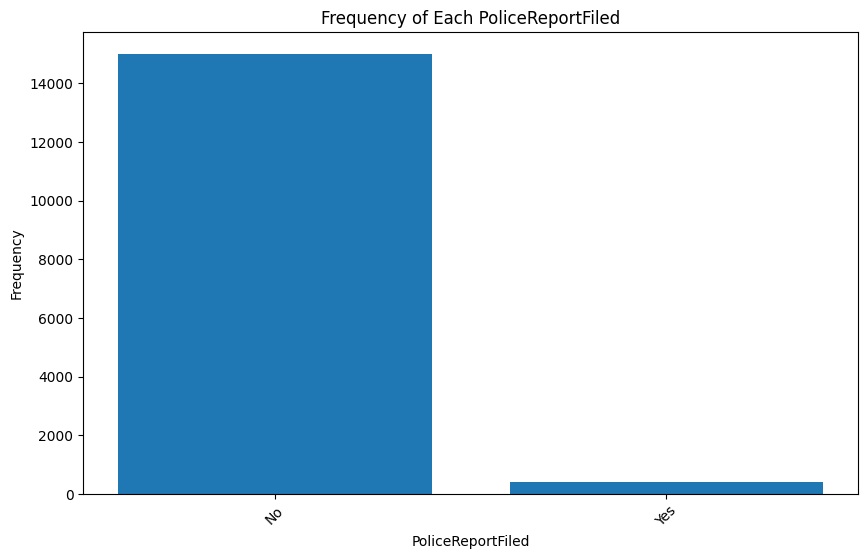

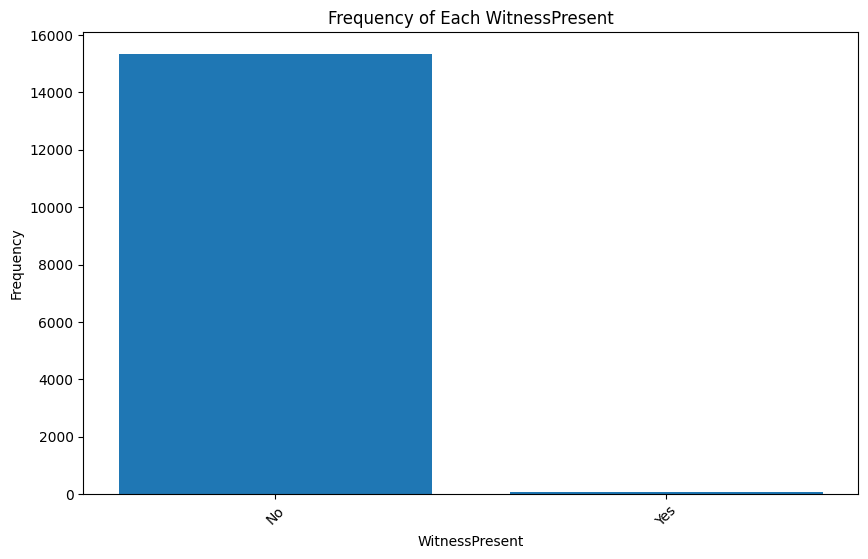

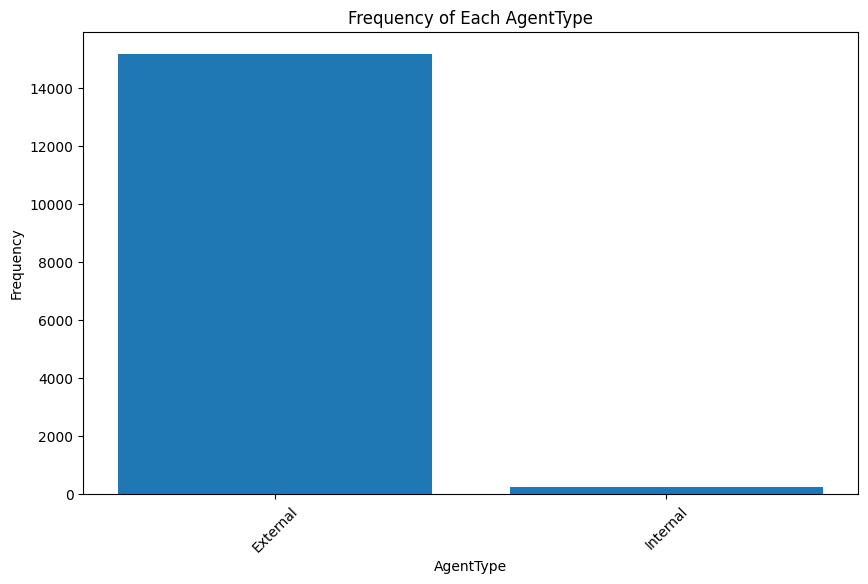

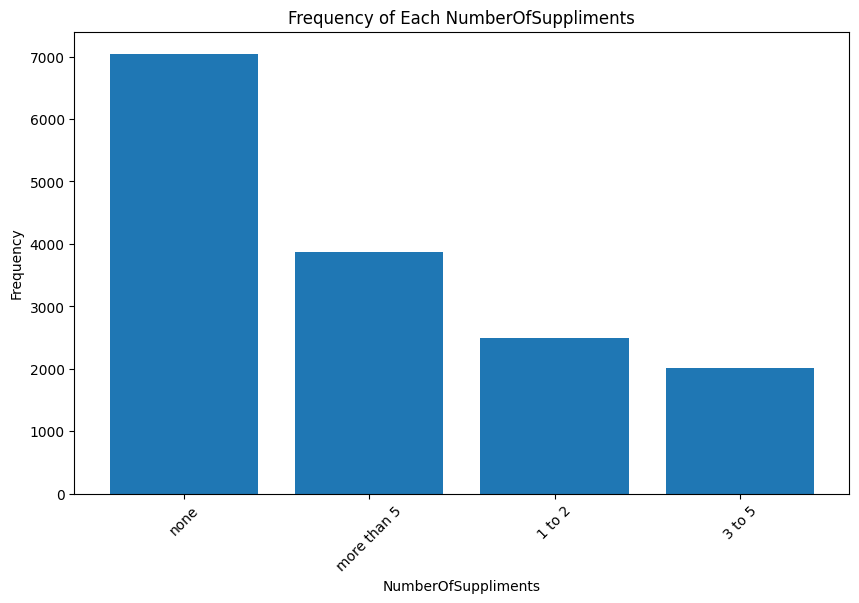

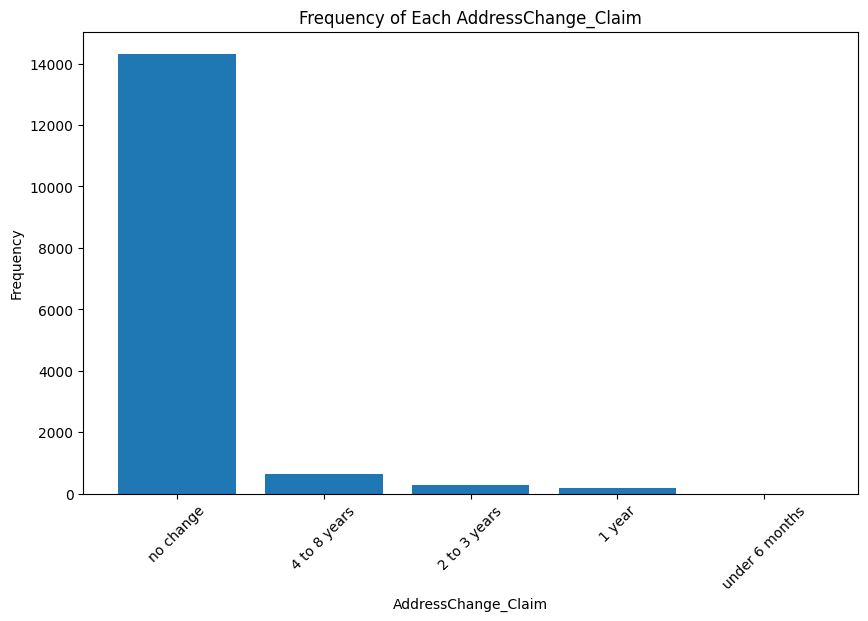

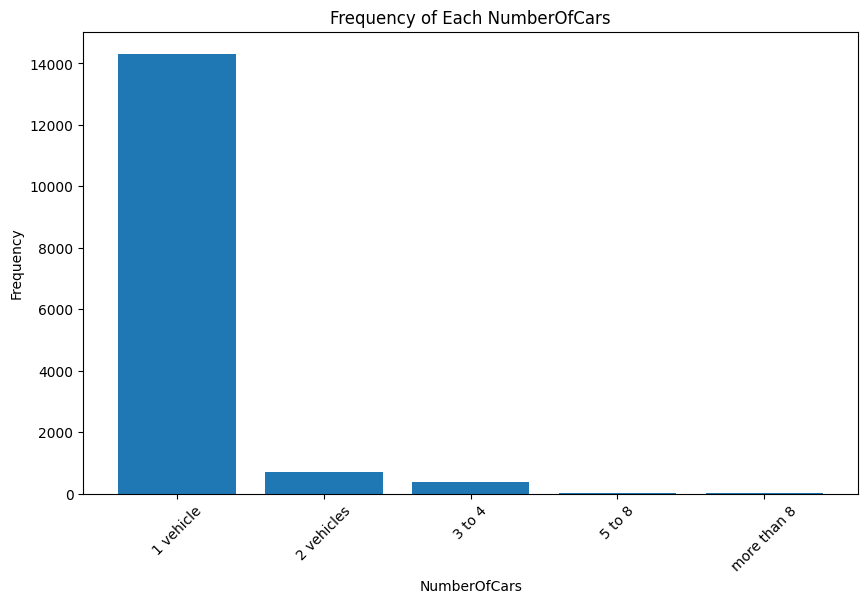

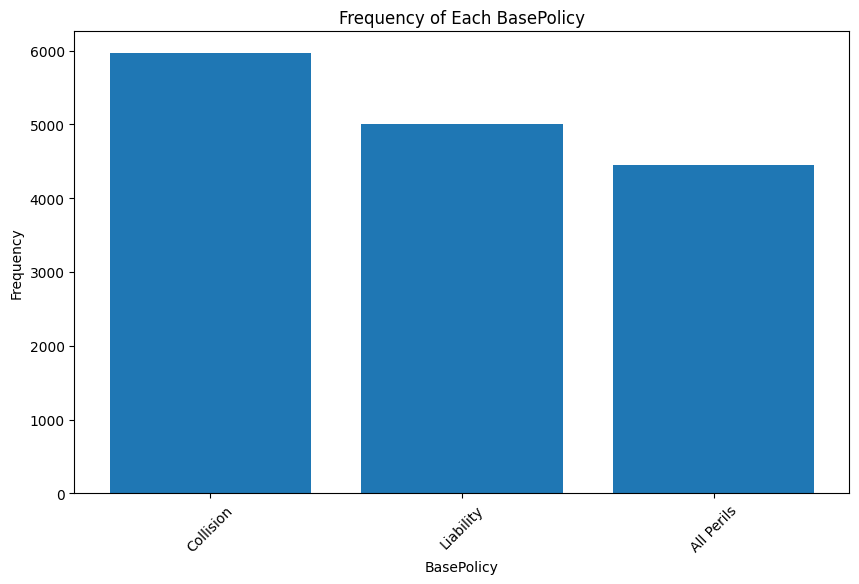

In [ ]:
for i in cat_cols:
    catFreq(df, i)

<h4>

**Observations**
- **Car Make**: Top 5 cars brand claiming are: Pontiac, Toyota, Honda, Mazda, Chevrolet
- **AccidentArea**: 90% of the accident are in Urban Areas
- **WeekdayClaims**: Claims are most likely to be made during Weekdays, especially Monday and Tuesday.
- **MonthClaimed**: January, May, March, and October see the highest number of Claims. Spring and Fall are more likely to have claims than other season.
- **Sex**: 85% of the claims are from Male
- **Marital Status**: Most claims are from Married and followed by Single status. Divorced and Widow are very rare.
- **Fault**: Policy Holders accounts for more claims than Third Party.
- **Policy Type**: Sedan-Collision and Sedan-Liability, and Sedan-AllPerils are top 3 for Claims
- **VehicleCategory**: Most accidents are involved with Sedan and Sport type.
- **Price**: Most cars's Price range from $20k - $29k

<h2> Bivariate Analysis <h2

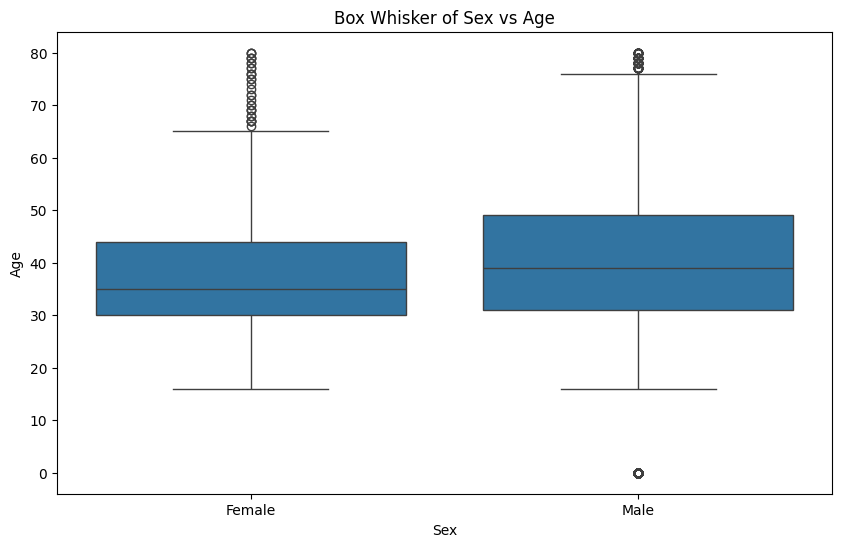

In [ ]:
# Box whisker of Sex vs Age
plt.figure(figsize=(10,6))
sns.boxplot(x='Sex', y='Age', data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Box Whisker of Sex vs Age')
plt.show()
# Looking into Fault

**Observations**:
- Male's average Age are higher than that of Female. However, the Age range of Female are wider.

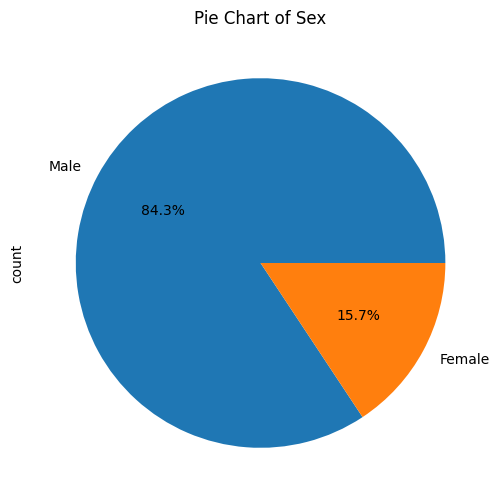

In [ ]:
# Pie chart of Sex and remove the 'count'
plt.figure(figsize=(10,6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Sex')
plt.show()

<Axes: xlabel='AccidentArea', ylabel='count'>

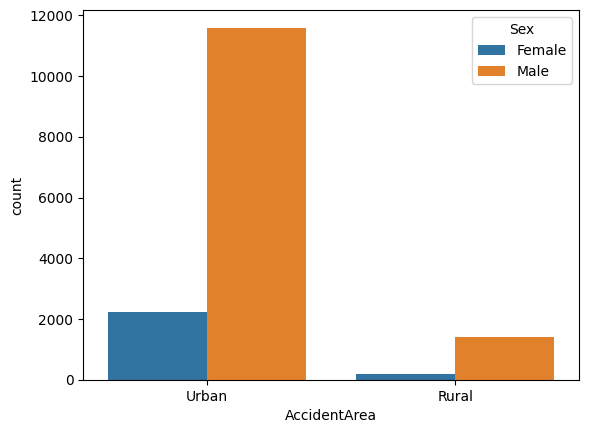

In [ ]:
sns.countplot(x='AccidentArea', hue='Sex',data=df)


In [ ]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


<h3> More into 'FraudFound_P'

<Axes: xlabel='FraudFound_P', ylabel='count'>

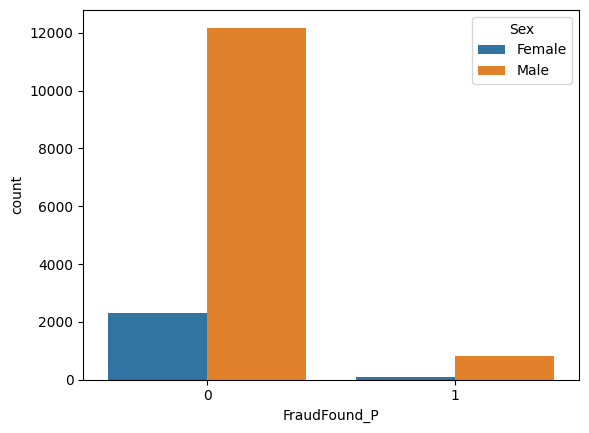

In [ ]:
# Bivariate Anlaysis with "FraduFound_P"
sns.countplot(x='FraudFound_P', hue = 'Sex', data=df)

<Axes: xlabel='FraudFound_P', ylabel='Age'>

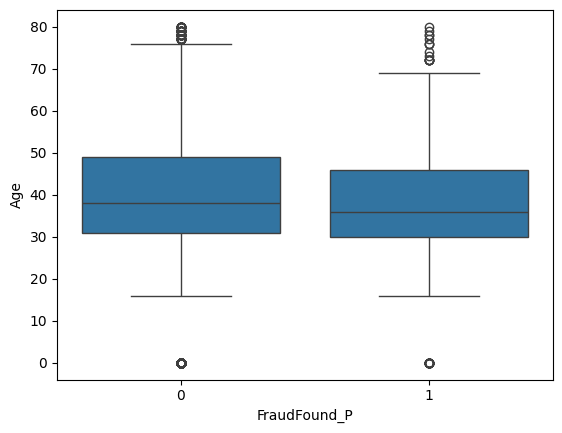

In [ ]:
sns.boxplot(x='FraudFound_P', y='Age', data=df)

<Axes: title={'center': 'Fraud Frequency by Age of Vehicle'}, xlabel='Age of Car', ylabel='Num of Fraud'>

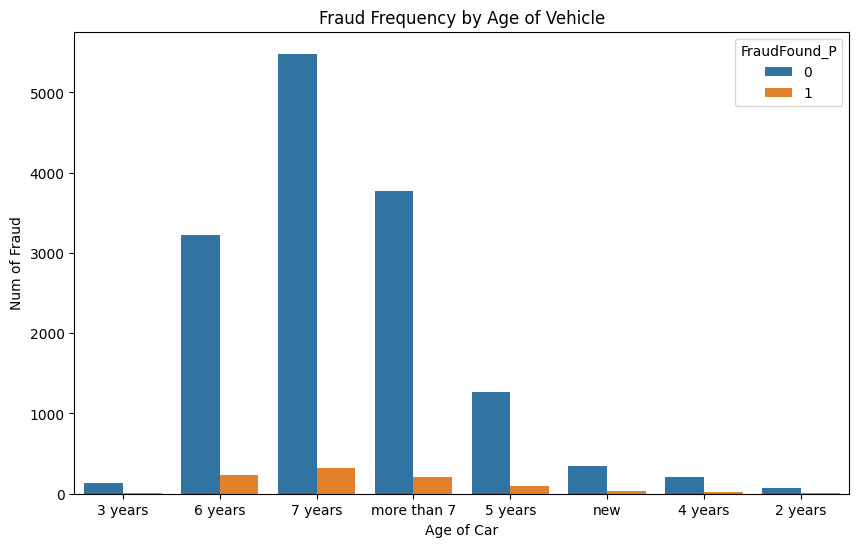

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Fraud Frequency by Age of Vehicle')
plt.xlabel('Age of Car')
plt.ylabel('Num of Fraud')
sns.countplot(x='AgeOfVehicle', hue ='FraudFound_P', data=df)

**Observations**:
- Vehicles with 6 years or above old will be more likely to found as Fraud since people probably tend to make a benefits out of their policy.

In [ ]:
# @title driverRating and Fraudfound and sort by fraud1s
table = pd.crosstab(df['DriverRating'], df['FraudFound_P'])
table = table.sort_values(by=1, ascending=False)
table

FraudFound_P,0,1
DriverRating,,
3,3642,242
4,3556,235
1,3712,232
2,3587,214


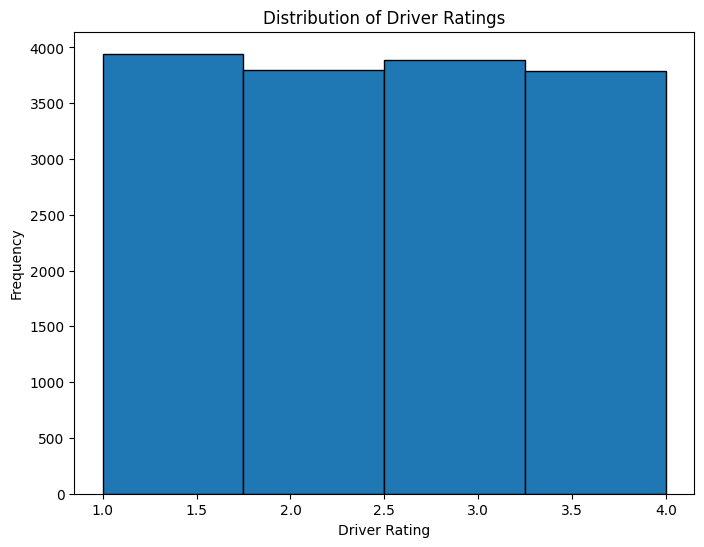

In [ ]:
# @title Distribution of Driver Ratings

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['DriverRating'], bins=4, edgecolor='black')
plt.title('Distribution of Driver Ratings')
plt.xlabel('Driver Rating')
_ = plt.ylabel('Frequency')

<h1> 5. Correlations

In [ ]:
df=df.drop(['Month', 'DayOfWeek', 'PolicyNumber'], axis=1) #drop columns

In [ ]:
df.head()

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,3,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,5,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,2,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,5,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
# Turn rest of categorical variables into binary
df_AccidentArea={'Urban': 1, 'Rural':0}
df_Sex={'Male': 1, 'Female':0}
df_Fault={'Policy Holder': 1, 'Third Party':0}
df_PoliceReportFiled={'Yes': 1, 'No':0}
df_WitnessPresent={'Yes': 1, 'No':0}
df_AgentType={'External': 1, 'Internal':0}
df_VehiclePrice={'more than 69000': 6, '20000 to 29000': 2, '30000 to 39000': 3,
       'less than 20000': 1, '40000 to 59000': 4, '60000 to 69000': 5}
df_NumberOfSuppliments={'none': 1, 'more than 5': 4, '3 to 5': 3, '1 to 2': 2}

df['AccidentArea'] = df['AccidentArea'].map(df_AccidentArea)
df['Sex'] = df['Sex'].map(df_Sex)
df['Fault'] = df['Fault'].map(df_Fault)
df['PoliceReportFiled'] = df['PoliceReportFiled'].map(df_PoliceReportFiled)
df['WitnessPresent'] = df['WitnessPresent'].map(df_WitnessPresent)
df['AgentType'] = df['AgentType'].map(df_AgentType)
df['VehiclePrice'] = df['VehiclePrice'].map(df_VehiclePrice)
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(df_NumberOfSuppliments)

# Get dummies of categorical variables that aren't ordinal
cat_cols_dummies=['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']

df=pd.get_dummies(data=df, columns=cat_cols_dummies, drop_first=True)

cat_cols_dummies_2=['WeekOfMonth','DayOfWeekClaimed','WeekOfMonthClaimed','MaritalStatus']
# cat_colsdummies = ['Make','DayOfWeekClaimed', 'MonthClaimed','MaritalStatus','PolicyType', 'VehicleCategory','Days_Policy_Accident', 'Days_Policy_Claim','PastNumberOfClaims', 'AgeOfVehicle','AgeOfPolicyHolder', 'AddressChange_Claim','NumberOfCars','BasePolicy']

df=pd.get_dummies(data=df, columns=cat_cols_dummies_2, drop_first=True)

df.head()


,Make,MonthClaimed,Age,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,...,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,Honda,Jan,21,Sport - Liability,Sport,6,0,12,300,1,...,False,True,False,False,False,False,False,False,True,False
1,Honda,Jan,34,Sport - Collision,Sport,6,0,15,400,4,...,False,False,False,False,False,True,False,False,True,False
2,Honda,Nov,47,Sport - Collision,Sport,6,0,7,400,3,...,True,False,False,True,False,False,False,True,False,False
3,Toyota,Jul,65,Sedan - Liability,Sport,2,0,4,400,2,...,False,False,False,False,False,False,False,True,False,False
4,Honda,Feb,27,Sport - Collision,Sport,6,0,3,400,1,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
df['FraudFound_P'].value_counts()

,count
FraudFound_P,
0,14497
1,923


In [ ]:
print(df.dtypes)

Make                          object
MonthClaimed                  object
Age                            int64
PolicyType                    object
VehicleCategory               object
VehiclePrice                   int64
FraudFound_P                   int64
RepNumber                      int64
Deductible                     int64
DriverRating                   int64
Days_Policy_Accident          object
Days_Policy_Claim             object
PastNumberOfClaims            object
AgeOfVehicle                  object
AgeOfPolicyHolder             object
NumberOfSuppliments            int64
AddressChange_Claim           object
NumberOfCars                  object
Year                           int64
BasePolicy                    object
AccidentArea_1                  bool
Sex_1                           bool
Fault_1                         bool
PoliceReportFiled_1             bool
WitnessPresent_1                bool
AgentType_1                     bool
WeekOfMonth_2                   bool
W

In [ ]:
df_numeric = df.select_dtypes(include=['int64','bool'])

In [ ]:
# df_cat = df.drop(["WeekOfMonth", "WeekOfMonthClaimed", "Age", "RepNumber", "Deductible", "DriverRating", "Year"], axis=1) #drop columns

In [ ]:
df_numeric.head()

,Age,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,NumberOfSuppliments,Year,AccidentArea_1,Sex_1,...,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,21,6,0,12,300,1,1,1994,True,False,...,False,True,False,False,False,False,False,False,True,False
1,34,6,0,15,400,4,1,1994,True,True,...,False,False,False,False,False,True,False,False,True,False
2,47,6,0,7,400,3,1,1994,True,True,...,True,False,False,True,False,False,False,True,False,False
3,65,2,0,4,400,2,4,1994,False,True,...,False,False,False,False,False,False,False,True,False,False
4,27,6,0,3,400,1,1,1994,True,False,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
print(df_numeric.dtypes)

Age                           int64
VehiclePrice                  int64
FraudFound_P                  int64
RepNumber                     int64
Deductible                    int64
DriverRating                  int64
NumberOfSuppliments           int64
Year                          int64
AccidentArea_1                 bool
Sex_1                          bool
Fault_1                        bool
PoliceReportFiled_1            bool
WitnessPresent_1               bool
AgentType_1                    bool
WeekOfMonth_2                  bool
WeekOfMonth_3                  bool
WeekOfMonth_4                  bool
WeekOfMonth_5                  bool
DayOfWeekClaimed_Friday        bool
DayOfWeekClaimed_Monday        bool
DayOfWeekClaimed_Saturday      bool
DayOfWeekClaimed_Sunday        bool
DayOfWeekClaimed_Thursday      bool
DayOfWeekClaimed_Tuesday       bool
DayOfWeekClaimed_Wednesday     bool
WeekOfMonthClaimed_2           bool
WeekOfMonthClaimed_3           bool
WeekOfMonthClaimed_4        

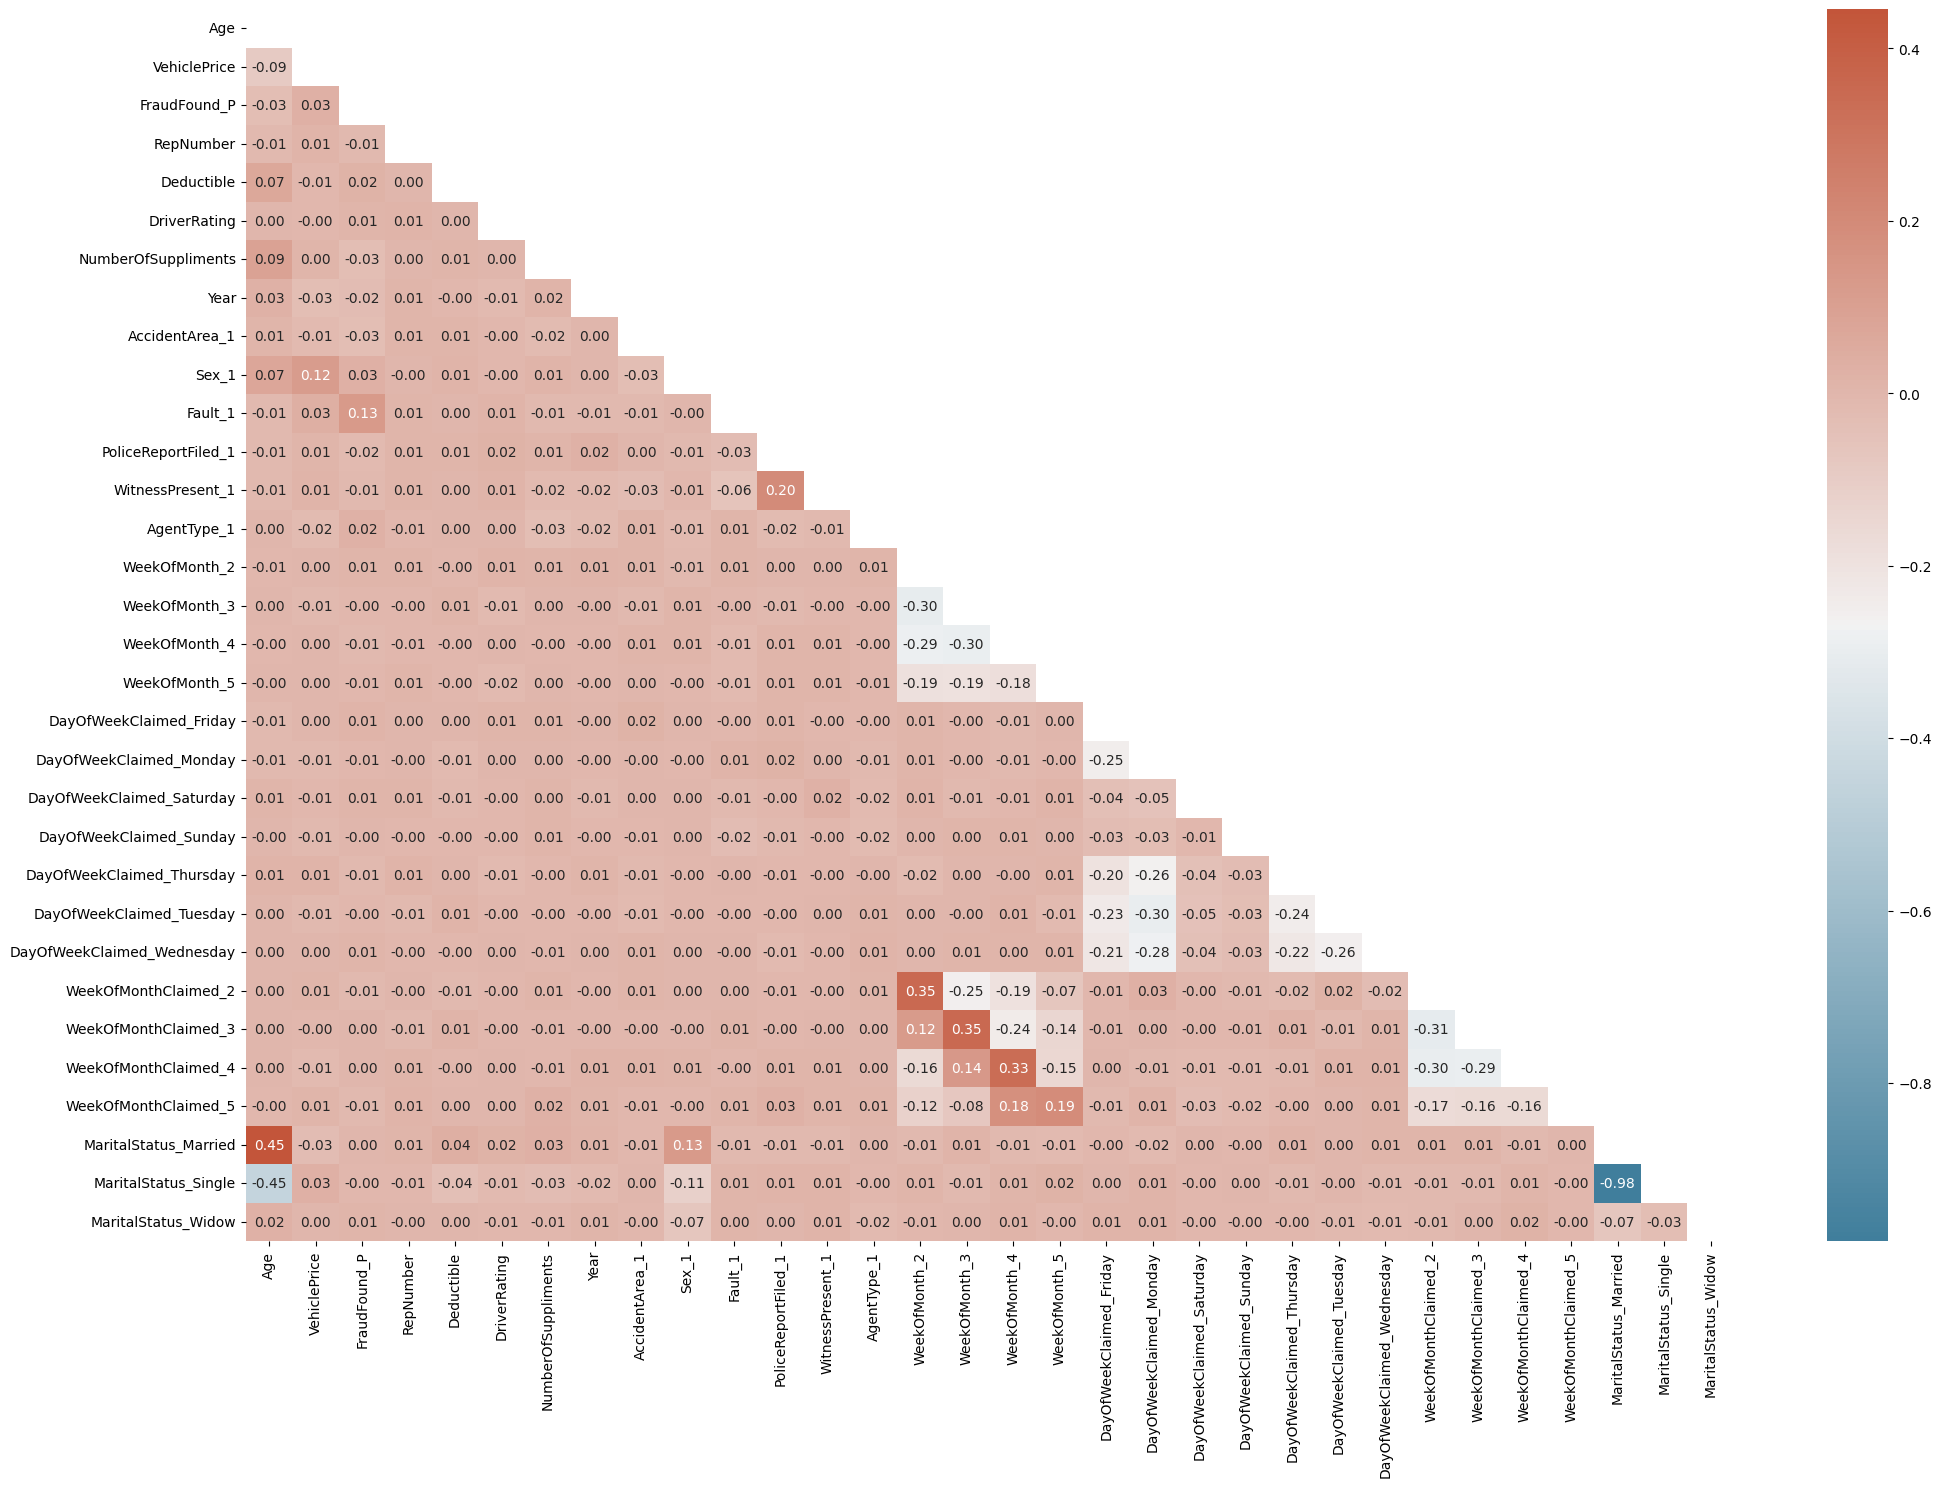

In [ ]:
plt.figure(figsize=(24,16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = df_numeric.corr()
# Getting the Upper Triangle of the co-relation matrix
#matrix = np.triu(df.corr())
matrix = np.triu(np.ones_like(corr, dtype=bool))
# Create a visual view of the pairwise correlations
sns.heatmap(corr,annot=True,fmt='.2f',cmap=cmap, mask=matrix)

plt.show()

**Observations**:
- Seems like all our variables are not correlated at all, which is a good thing since we want to avoid correlations when building our model.

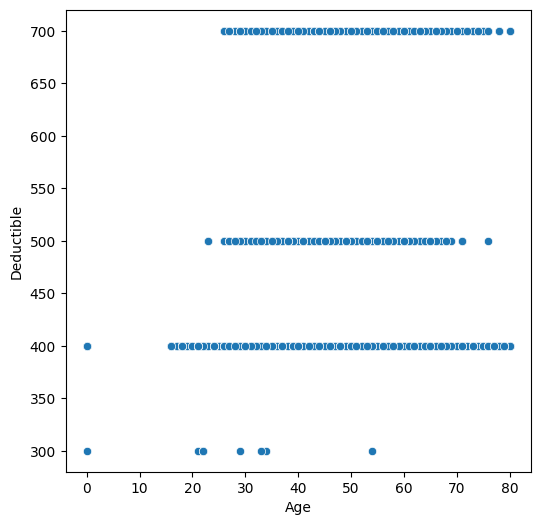

In [ ]:
# creating a scatterplot for Age and Deductible
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Age', y='Deductible')
plt.show()

## 6. Remove Variables/Outliers

- There is no outstanding outlier in our dataset, 70% of features are categorical.

## 7. Split the data

In [ ]:
X = df_numeric.drop("FraudFound_P", axis=1).values
y = df_numeric["FraudFound_P"].values

## 8. SCALE Predictors & SPLIT Data

In [ ]:
sc = StandardScaler() # imported with the libraries, we give it an alias here
X_scaled = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

## 9. Building Models

### **Logistic Regression**

### Examine the Shape

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12336, 31)
(3084, 31)
(12336,)
(3084,)


In [ ]:
lg = LogisticRegression(random_state = 42, class_weight='balanced')
# fitting model on Training data
lg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

###  Checking Model Performance

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.97      0.45      0.62     11598
           1       0.09      0.80      0.15       738

    accuracy                           0.47     12336
   macro avg       0.53      0.63      0.39     12336
weighted avg       0.92      0.47      0.59     12336



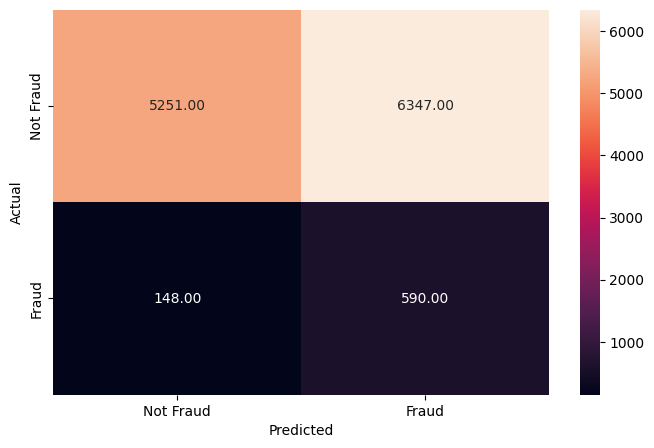

Training Accuracy:  0.47349221789883267


In [ ]:
# predicting on training data
y_pred_train = lg.predict(X_train)

# check performance on training data
metrics_score(y_train, y_pred_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training Accuracy: ', train_accuracy)

              precision    recall  f1-score   support

           0       0.98      0.45      0.62      2899
           1       0.09      0.82      0.16       185

    accuracy                           0.47      3084
   macro avg       0.53      0.64      0.39      3084
weighted avg       0.92      0.47      0.59      3084



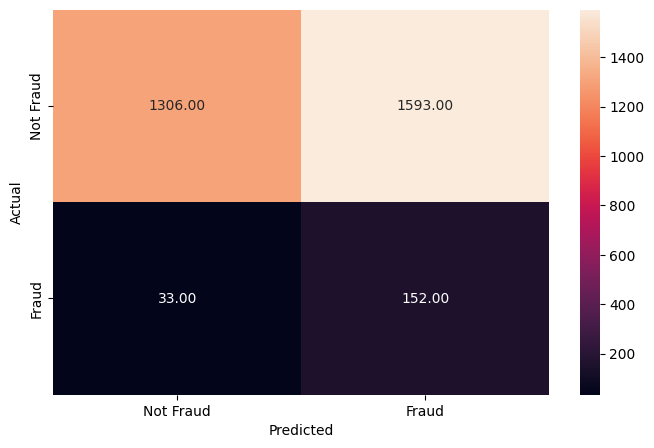

Test Accuracy:  0.4727626459143969


In [ ]:
# predicting on testing data
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test Accuracy: ', test_accuracy)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_test)
precision = precision_score(y_test,y_pred_test)
recall = recall_score(y_test,y_pred_test)
#f1=f1_score(y_test,y_pred)
print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ", recall)
#print(f1)

Accuracy:  0.4727626459143969
Precision:  0.08710601719197708
Recall:  0.8216216216216217


## **K Nearest Neighbors**

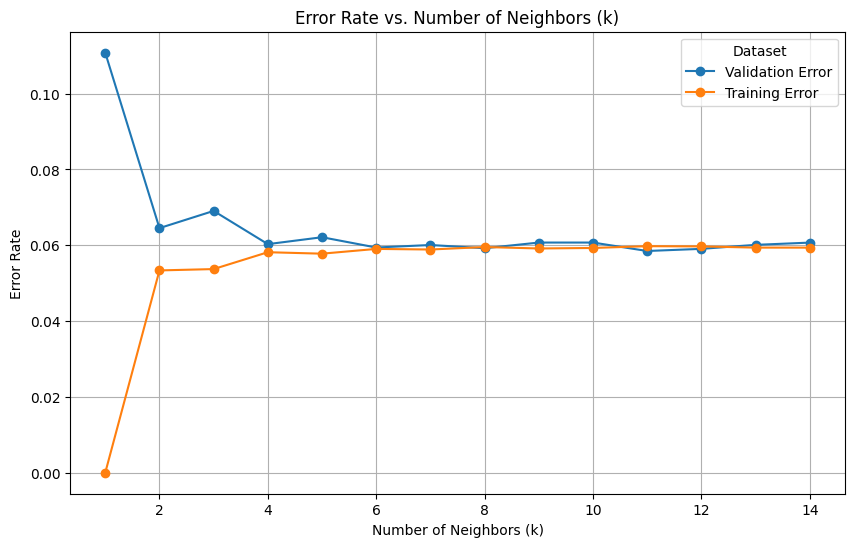

In [ ]:
knn = KNeighborsClassifier()

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = df.columns

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)

        #Fitting knn on training data
        knn.fit(X_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(X_train_new, y_train_new))
        test_error.append(1 - knn.score(X_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

# Initialize lists to store k values and corresponding error rates for validation and training
kltest = []  # For storing k values for validation error
vltest = []  # For storing validation error rates
kltrain = []  # For storing k values for training error
vltrain = []  # For storing training error rates

# Extract validation error rates for each k from the knn_many_split dictionary
for k, v in knn_many_split.items():
    kltest.append(k)  # Add the current k value
    vltest.append(knn_many_split[k][1])  # Add the validation error for the current k

# Extract training error rates for each k from the knn_many_split dictionary
for k, v in knn_many_split.items():
    kltrain.append(k)  # Add the current k value
    vltrain.append(knn_many_split[k][0])  # Add the training error for the current k

# Plotting k values vs. error rates for both training and validation datasets
plt.figure(figsize=(10, 6))  # Create a figure with specified size
plt.plot(kltest, vltest, label='Validation Error', marker='o')  # Plot validation error with markers
plt.plot(kltrain, vltrain, label='Training Error', marker='o')  # Plot training error with markers

# Add title and labels to the plot for better understanding
plt.title('Error Rate vs. Number of Neighbors (k)')  # Set the title of the plot
plt.xlabel('Number of Neighbors (k)')  # Label for the x-axis, indicating different k values
plt.ylabel('Error Rate')  # Label for the y-axis, showing error rates

# Add a grid for easier visualization of the plot
plt.grid(True)  # Display a grid on the plot for better readability

# Add a legend to differentiate between the training and validation error lines
plt.legend(title='Dataset')  # Display legend with a title for clarity

# Display the final plot
plt.show()  # Render the plot


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11598
           1       0.91      0.04      0.08       738

    accuracy                           0.94     12336
   macro avg       0.92      0.52      0.52     12336
weighted avg       0.94      0.94      0.92     12336



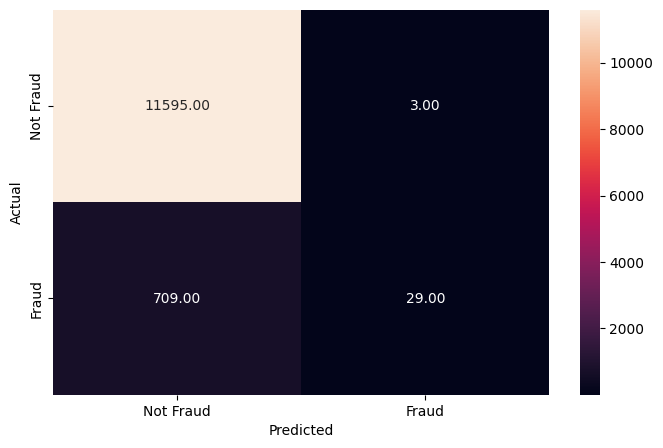

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.40      0.01      0.02       185

    accuracy                           0.94      3084
   macro avg       0.67      0.50      0.49      3084
weighted avg       0.91      0.94      0.91      3084



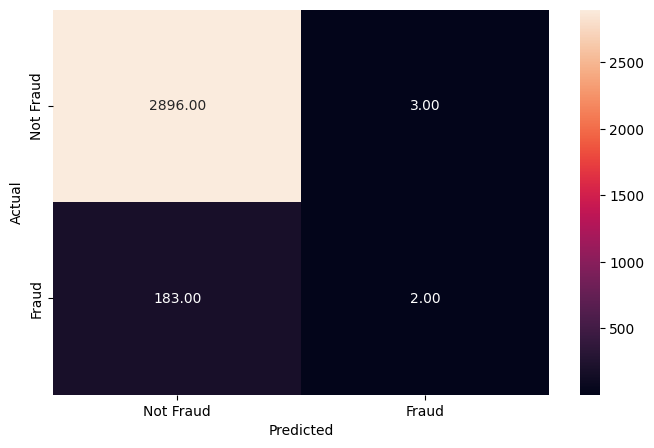

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

#fitting data to the KNN model
knn.fit(X_train,y_train)

#checking the performance of knn model
y_pred_train_knn = knn.predict(X_train)
metrics_score(y_train, y_pred_train_knn)

y_pred_test_knn = knn.predict(X_test)
metrics_score(y_test, y_pred_test_knn)
